In [5]:
globals().clear()

# Importing necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plotting font to Segoe UI (font used for the report)
plt.rcParams['font.family'] = 'Segoe UI'

# Load the dataset
df = pd.read_csv("FeaturesSelected.csv")

In [6]:
# ENCODING TECHNIQUES

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# Select categoric and numeric columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
categorical_df = df[categorical_features]
numerical_features = df.select_dtypes(include=['Int32', 'Int64', 'Float64']).columns
numerical_df = df[numerical_features]

# Encode categoric values

target = 'Price'
encoded_categorical_df = categorical_df.copy()
for col in categorical_features:
    encoded_categorical_df[col] = encoded_categorical_df[col].map(df.groupby(col)[target].mean())

df_encoded = pd.concat([encoded_categorical_df, numerical_df], axis=1)

#print(df_encoded.columns)


In [7]:
# GET OPTIMUM FEATURES

correlation_matrix = df_encoded.corr()
correlation_coeff = correlation_matrix['Price']
filtered_features = correlation_coeff[correlation_coeff > 0.1].index
df_encoded = df_encoded[filtered_features]

#print(filtered_features)

In [8]:
# EFFECT OF ENCODING TECHNIQUES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error


# SPLIT TRAIN AND TEST DATA
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODEL TRAINING
model = LinearRegression()
model.fit(X_train, y_train)


# MODEL EVALUATION
y_pred = model.predict(X_test)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")


Model Performance:
-------------------
Mean Absolute Error (MAE): 153677.64
Root Mean Squared Error (RMSE): 345939.33
Median Absolute Error (MedAE): 72098.30
Mean Absolute Percentage Error (MAPE): 85.28%
R² Score: 0.9429



In [9]:
# EFFECT OF PRICE TRANSFORMATION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from scipy.stats import boxcox


# TRANSFORMATION OF PRICE COLUMN
df_encoded_transf = df_encoded.copy()
df_encoded_transf['Price_transf'] = np.log1p(df_encoded['Price'])


# SPLIT TRAIN AND TEST DATA
X = df_encoded_transf.drop(columns=['Price_transf', 'Price'])
y = df_encoded_transf['Price_transf'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# MODEL TRAINING
model = LinearRegression()
model.fit(X_train, y_train)


# MODEL EVALUATION
y_pred = model.predict(X_test)


# REVERSE TRANSFORAMTION
y_pred = np.expm1(y_pred)
y_test_original = np.expm1(y_test)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")


Model Performance:
-------------------
Mean Absolute Error (MAE): 1358965.40
Root Mean Squared Error (RMSE): 20185206.10
Median Absolute Error (MedAE): 89586.12
Mean Absolute Percentage Error (MAPE): 97.36%
R² Score: -193.2616



In [10]:
# EFFECT OF SCALING TECHNIQUES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer


# SPLIT TRAIN AND TEST DATA
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SCALE DATA (norm='l2' for Normalizer, output_distribution='normal', random_state=42 for QuantileTransformer)
scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# MODEL TRAINING
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


# MODEL EVALUATION
y_pred_scaled = model.predict(X_test_scaled)


# GOING BACK TO ORIGINAL SCALE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()



# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")



Model Performance:
-------------------
Mean Absolute Error (MAE): 112975.17
Root Mean Squared Error (RMSE): 298076.81
Median Absolute Error (MedAE): 27268.98
Mean Absolute Percentage Error (MAPE): 26.57%
R² Score: 0.9561



In [11]:
# MOST ACCURATE LINEAR MODEL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer


# TRANSFORMATION OF PRICE COLUMN
df_encoded_transf = df_encoded.copy()
df_encoded_transf['Price_transf'] = np.log1p(df_encoded_transf['Price'])


# SPLIT TRAIN AND TEST DATA
X = df_encoded_transf.drop(columns=['Price_transf', 'Price'])
y = df_encoded_transf['Price_transf'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SCALE DATA (norm='l2' for Normalizer, output_distribution='normal', random_state=42 for QuantileTransformer)
scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# MODEL TRAINING
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


# MODEL EVALUATION
y_pred_scaled = model.predict(X_test_scaled)


# GOING BACK TO ORIGINAL SCALE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


# REVERSE TRANSFORAMTION
y_pred = np.expm1(y_pred)
y_test_original = np.expm1(y_test_original)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")


Model Performance:
-------------------
Mean Absolute Error (MAE): 113067.41
Root Mean Squared Error (RMSE): 298357.73
Median Absolute Error (MedAE): 27147.92
Mean Absolute Percentage Error (MAPE): 26.56%
R² Score: 0.9561



In [12]:
# MOST ACCURATE LINEAR MODEL

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score


# TRANSFORMATION OF PRICE COLUMN
df_encoded_transf = df_encoded.copy()
df_encoded_transf['Price_transf'] = np.log1p(df_encoded_transf['Price'])


# SPLIT TRAIN AND TEST DATA
X = df_encoded_transf.drop(columns=['Price_transf', 'Price'])
y = df_encoded_transf['Price_transf'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SCALE DATA (norm='l2' for Normalizer, output_distribution='normal', random_state=42 for QuantileTransformer)
scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# MODEL TRAINING
model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train_scaled.ravel(), cv=kfold, scoring='neg_mean_squared_error')
model.fit(X_train_scaled, y_train_scaled)


# MODEL EVALUATION
y_pred_scaled = model.predict(X_test_scaled)


# GOING BACK TO ORIGINAL SCALE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


# REVERSE TRANSFORAMTION
y_pred = np.expm1(y_pred)
y_test_original = np.expm1(y_test_original)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")


Model Performance:
-------------------
Mean Absolute Error (MAE): 113067.41
Root Mean Squared Error (RMSE): 298357.73
Median Absolute Error (MedAE): 27147.92
Mean Absolute Percentage Error (MAPE): 26.56%
R² Score: 0.9561



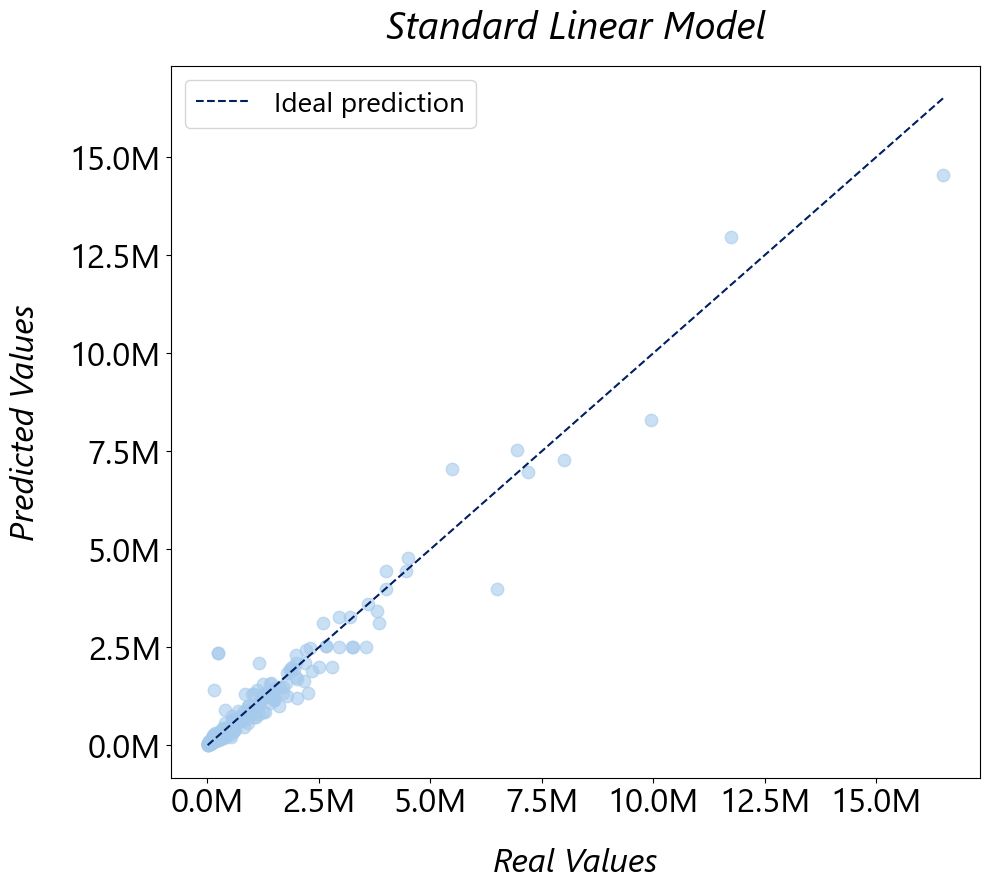

In [13]:
# STANDARD LINEAR MODEL PERFORMANCE VISUALIZATION

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create figure
fig, ax = plt.subplots(figsize=(10, 9))

# Scatter plot
ax.scatter(y_test_original, y_pred, s=80, c='#A6CAEC',alpha=0.6, edgecolor='#A6CAEC')
ax.plot([min(y_test_original), max(y_test_original)],
        [min(y_test_original), max(y_test_original)],
         linestyle='--', color='#002060',label='Ideal prediction')

# Labels and title
ax.set_xlabel('Real Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.set_ylabel('Predicted Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=24)

# FAxis format
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Offset font
ax.yaxis.get_offset_text().set_fontsize(24)
ax.xaxis.get_offset_text().set_fontsize(24)
ax.set_title('Standard Linear Model', fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)

ax.legend(fontsize=20)
plt.tight_layout()
plt.show()


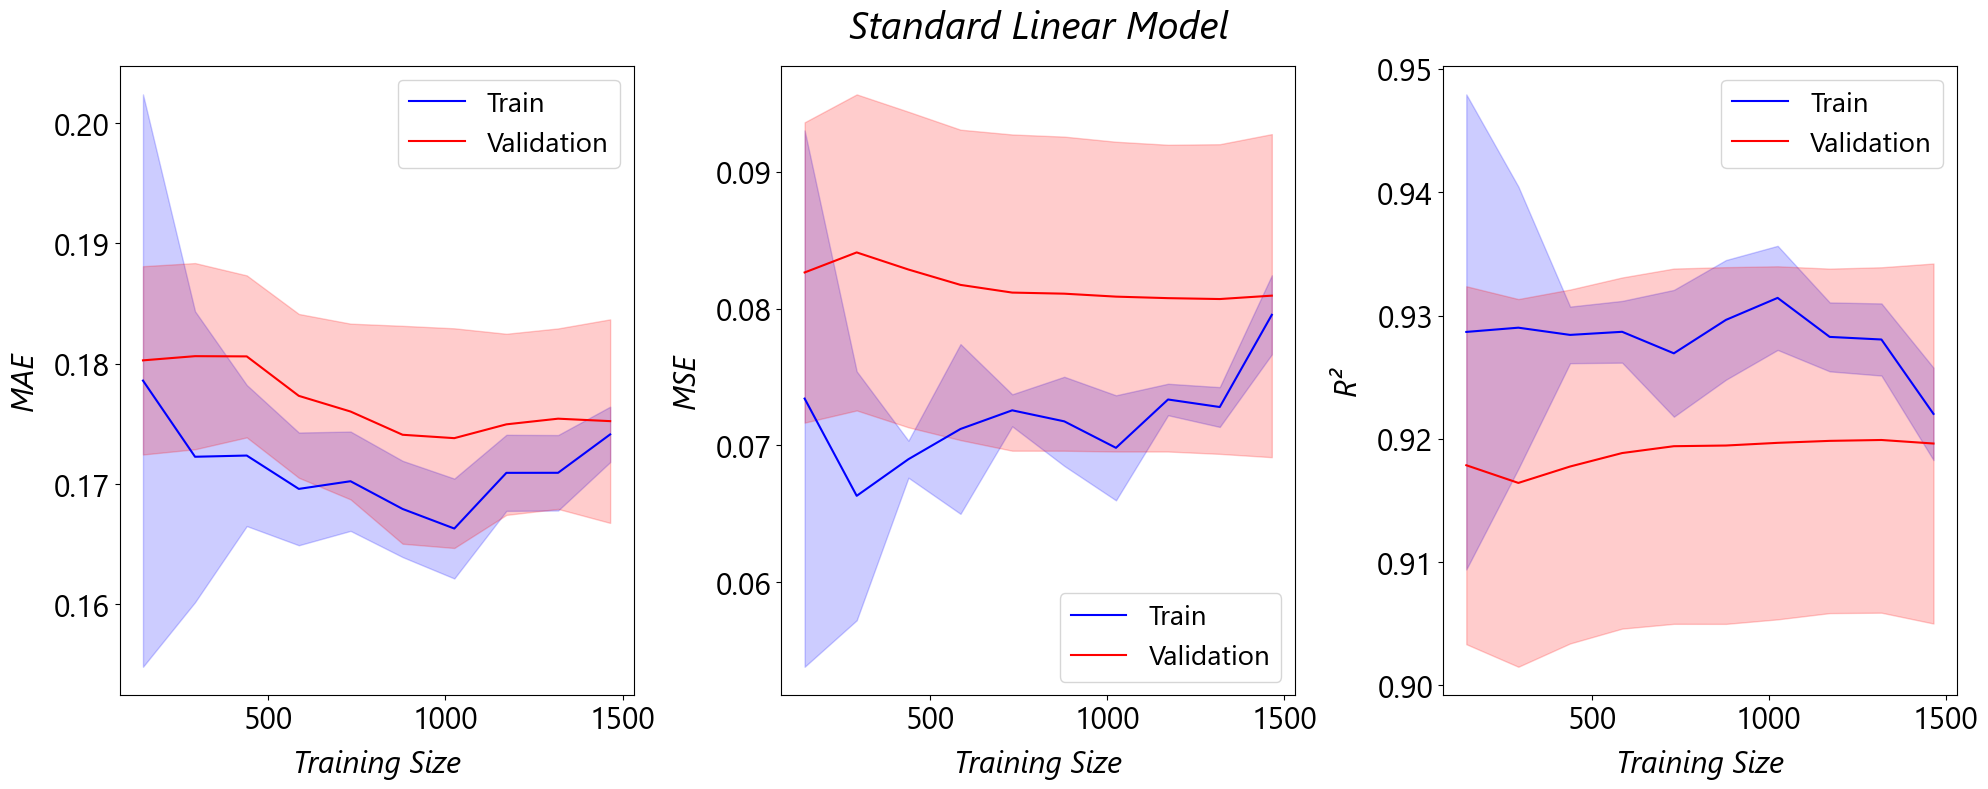

In [14]:
# STANDARD LINEAR MODEL VALIDATION

from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Define metrics
scoring_mae = make_scorer(mean_absolute_error)
scoring_mse = make_scorer(mean_squared_error)
scoring_r2 = make_scorer(r2_score)

# Learning of curves for each of the metrics
train_sizes, train_scores_mae, valid_scores_mae = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mae, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_mse, valid_scores_mse = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mse, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_r2, valid_scores_r2 = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_r2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means and standard deviations
train_mean_mae = train_scores_mae.mean(axis=1)
valid_mean_mae = valid_scores_mae.mean(axis=1)
train_mean_mse = train_scores_mse.mean(axis=1)
valid_mean_mse = valid_scores_mse.mean(axis=1)
train_mean_r2 = train_scores_r2.mean(axis=1)
valid_mean_r2 = valid_scores_r2.mean(axis=1)

train_std_mae = train_scores_mae.std(axis=1)
valid_std_mae = valid_scores_mae.std(axis=1)
train_std_mse = train_scores_mse.std(axis=1)
valid_std_mse = valid_scores_mse.std(axis=1)
train_std_r2 = train_scores_r2.std(axis=1)
valid_std_r2 = valid_scores_r2.std(axis=1)


mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)


# Plot learning curves for MAE, MSE y R²
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# MAE
axs[0].plot(train_sizes, train_mean_mae, label="Train", color="blue")
axs[0].plot(train_sizes, valid_mean_mae, label="Validation", color="red")
axs[0].fill_between(train_sizes, train_mean_mae - train_std_mae, train_mean_mae + train_std_mae, color="blue", alpha=0.2)
axs[0].fill_between(train_sizes, valid_mean_mae - valid_std_mae, valid_mean_mae + valid_std_mae, color="red", alpha=0.2)
axs[0].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].set_ylabel("MAE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].tick_params(axis='both', which='major', labelsize=22)
axs[0].legend(fontsize=20)

# MSE
axs[1].plot(train_sizes, train_mean_mse, label="Train", color="blue")
axs[1].plot(train_sizes, valid_mean_mse, label="Validation", color="red")
axs[1].fill_between(train_sizes, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color="blue", alpha=0.2)
axs[1].fill_between(train_sizes, valid_mean_mse - valid_std_mse, valid_mean_mse + valid_std_mse, color="red", alpha=0.2)
axs[1].set_title("Standard Linear Model", fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)
axs[1].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].set_ylabel("MSE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].tick_params(axis='both', which='major', labelsize=22)
axs[1].legend(fontsize=20)

# R²
axs[2].plot(train_sizes, train_mean_r2, label="Train", color="blue")
axs[2].plot(train_sizes, valid_mean_r2, label="Validation", color="red")
axs[2].fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color="blue", alpha=0.2)
axs[2].fill_between(train_sizes, valid_mean_r2 - valid_std_r2, valid_mean_r2 + valid_std_r2, color="red", alpha=0.2)
axs[2].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].set_ylabel("R²", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].tick_params(axis='both', which='major', labelsize=22)
axs[2].legend(fontsize=20)

plt.tight_layout()
plt.show()




In [15]:
# READ THE COMPLETE DATAFRAME FOR LASSO, RIDGE AND ELASTIC NET
# df = pd.read_csv("MissingDataTreated.csv")
# df = df.drop(columns=['Eng. 1 Hours', 'Eng. 2 Hours', 'Maint. Eng. 1', 'Maint. Eng. 2', 'Prop. 1 Hours', 'Prop. 2 Hours', 'Maint. Prop. 1', 'Maint. Prop. 2', 'text', 'State'])

In [16]:
# # ENCODING TECHNIQUES

# from sklearn.preprocessing import OneHotEncoder
# import category_encoders as ce

# # Select categoric and numeric columns
# categorical_features = df.select_dtypes(include=['object', 'category']).columns
# categorical_df = df[categorical_features]
# numerical_features = df.select_dtypes(include=['Int32', 'Int64', 'Float64']).columns
# numerical_df = df[numerical_features]

# # Encode categoric values

# target = 'Price'
# encoded_categorical_df = categorical_df.copy()
# for col in categorical_features:
#     encoded_categorical_df[col] = encoded_categorical_df[col].map(df.groupby(col)[target].mean())

# df_encoded = pd.concat([encoded_categorical_df, numerical_df], axis=1)

# #print(df_encoded.columns)


In [17]:
# LASSO

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer


# TRANSFORMATION OF PRICE COLUMN
df_encoded_transf = df_encoded.copy()
df_encoded_transf['Price_transf'] = np.log1p(df_encoded_transf['Price'])


# SPLIT TRAIN AND TEST DATA
X = df_encoded_transf.drop(columns=['Price_transf', 'Price'])
y = df_encoded_transf['Price'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SCALE DATA (norm='l2' for Normalizer, output_distribution='normal', random_state=42 for QuantileTransformer)
scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# HYPERPARAMETER TUNING
param_grid = {'alpha': np.logspace(-4, 1, 6)}
grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# MODEL TRAINING WITH BEST PARAMETERS
model = Lasso(alpha=best_params['alpha'], random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# MODEL EVALUATION
y_pred_scaled = model.predict(X_test_scaled)


# GOING BACK TO ORIGINAL SCALE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


# REVERSE TRANSFORAMTION
# y_pred = np.expm1(y_pred)
# y_test_original = np.expm1(y_test_original)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred)
r2 = r2_score(y_test, y_pred)

# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")

Best parameters: {'alpha': 0.0001}

Model Performance:
-------------------
Mean Absolute Error (MAE): 112960.80
Root Mean Squared Error (RMSE): 298027.32
Median Absolute Error (MedAE): 27293.00
Mean Absolute Percentage Error (MAPE): 26.56%
R² Score: 0.9562



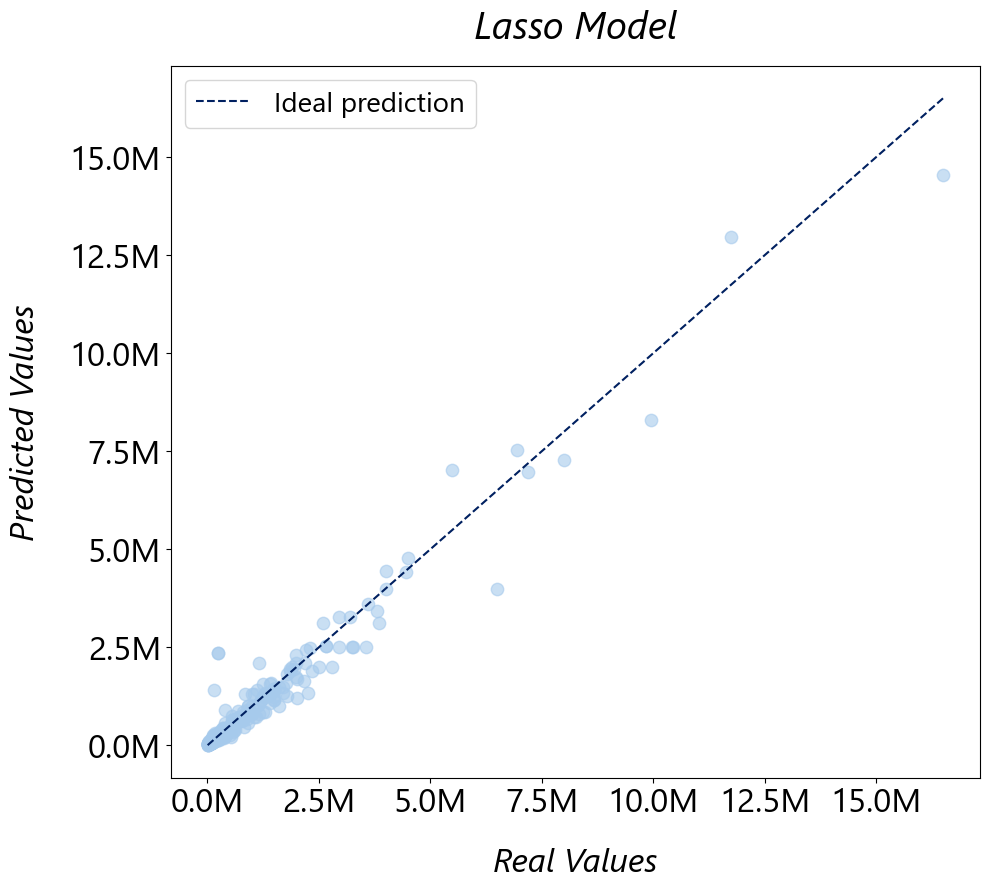

In [18]:
# LASSO MODEL PERFORMANCE VISUALIZATION

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create figure
fig, ax = plt.subplots(figsize=(10, 9))

# Scatter plot
ax.scatter(y_test_original, y_pred, s=80, c='#A6CAEC',alpha=0.6, edgecolor='#A6CAEC')
ax.plot([min(y_test_original), max(y_test_original)],
        [min(y_test_original), max(y_test_original)],
         linestyle='--', color='#002060',label='Ideal prediction')

# Labels and title
ax.set_xlabel('Real Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.set_ylabel('Predicted Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=24)

# Axis format
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Offset font
ax.yaxis.get_offset_text().set_fontsize(24)
ax.xaxis.get_offset_text().set_fontsize(24)
ax.set_title('Lasso Model', fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)

ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

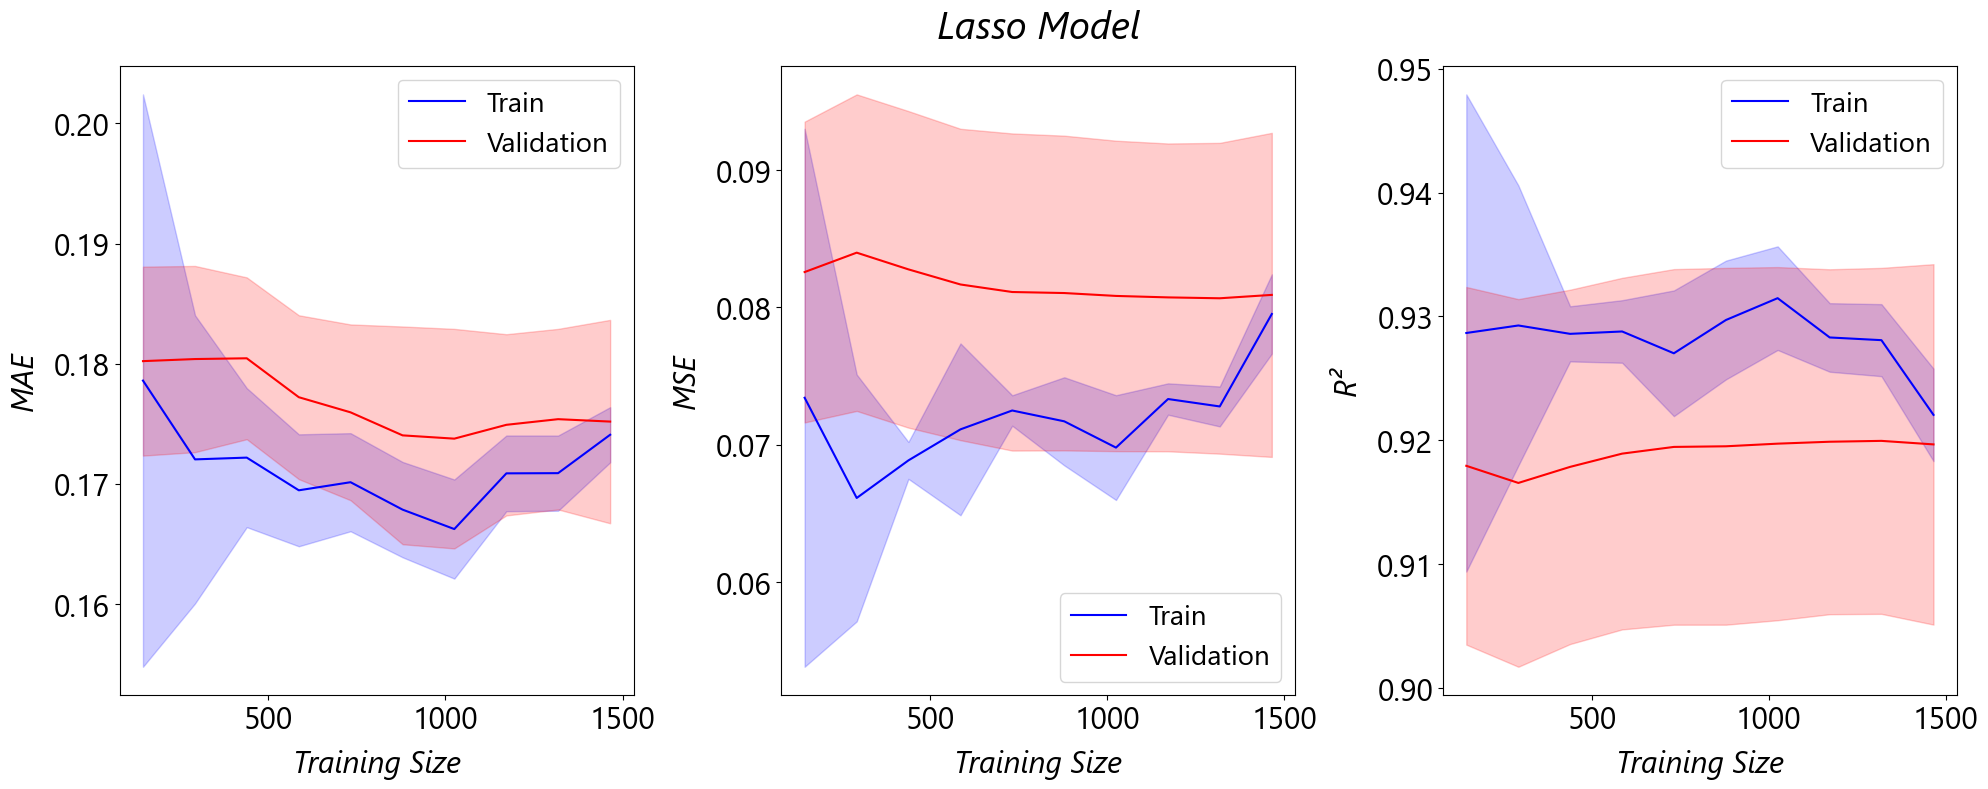

In [19]:
# LASSO MODEL VALIDATION

from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Define metrics
scoring_mae = make_scorer(mean_absolute_error)
scoring_mse = make_scorer(mean_squared_error)
scoring_r2 = make_scorer(r2_score)

# Learning of curves for each of the metrics
train_sizes, train_scores_mae, valid_scores_mae = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mae, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_mse, valid_scores_mse = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mse, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_r2, valid_scores_r2 = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_r2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means and standard deviations
train_mean_mae = train_scores_mae.mean(axis=1)
valid_mean_mae = valid_scores_mae.mean(axis=1)
train_mean_mse = train_scores_mse.mean(axis=1)
valid_mean_mse = valid_scores_mse.mean(axis=1)
train_mean_r2 = train_scores_r2.mean(axis=1)
valid_mean_r2 = valid_scores_r2.mean(axis=1)

train_std_mae = train_scores_mae.std(axis=1)
valid_std_mae = valid_scores_mae.std(axis=1)
train_std_mse = train_scores_mse.std(axis=1)
valid_std_mse = valid_scores_mse.std(axis=1)
train_std_r2 = train_scores_r2.std(axis=1)
valid_std_r2 = valid_scores_r2.std(axis=1)


mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)


# Plot learning curves for MAE, MSE y R²
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# MAE
axs[0].plot(train_sizes, train_mean_mae, label="Train", color="blue")
axs[0].plot(train_sizes, valid_mean_mae, label="Validation", color="red")
axs[0].fill_between(train_sizes, train_mean_mae - train_std_mae, train_mean_mae + train_std_mae, color="blue", alpha=0.2)
axs[0].fill_between(train_sizes, valid_mean_mae - valid_std_mae, valid_mean_mae + valid_std_mae, color="red", alpha=0.2)
axs[0].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].set_ylabel("MAE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].tick_params(axis='both', which='major', labelsize=22)
axs[0].legend(fontsize=20)

# MSE
axs[1].plot(train_sizes, train_mean_mse, label="Train", color="blue")
axs[1].plot(train_sizes, valid_mean_mse, label="Validation", color="red")
axs[1].fill_between(train_sizes, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color="blue", alpha=0.2)
axs[1].fill_between(train_sizes, valid_mean_mse - valid_std_mse, valid_mean_mse + valid_std_mse, color="red", alpha=0.2)
axs[1].set_title("Lasso Model", fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)
axs[1].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].set_ylabel("MSE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].tick_params(axis='both', which='major', labelsize=22)
axs[1].legend(fontsize=20)

# R²
axs[2].plot(train_sizes, train_mean_r2, label="Train", color="blue")
axs[2].plot(train_sizes, valid_mean_r2, label="Validation", color="red")
axs[2].fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color="blue", alpha=0.2)
axs[2].fill_between(train_sizes, valid_mean_r2 - valid_std_r2, valid_mean_r2 + valid_std_r2, color="red", alpha=0.2)
axs[2].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].set_ylabel("R²", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].tick_params(axis='both', which='major', labelsize=22)
axs[2].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [20]:
# RIDGE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer


# TRANSFORMATION OF PRICE COLUMN
df_encoded_transf = df_encoded.copy()
df_encoded_transf['Price_transf'] = np.log1p(df_encoded_transf['Price'])


# SPLIT TRAIN AND TEST DATA
X = df_encoded_transf.drop(columns=['Price_transf', 'Price'])
y = df_encoded_transf['Price'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SCALE DATA (norm='l2' for Normalizer, output_distribution='normal', random_state=42 for QuantileTransformer)
scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# HYPERPARAMETER TUNING
param_grid = {'alpha': np.logspace(-4, 1, 50)} 
grid_search = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# MODEL TRAINING WITH BEST PARAMETERS
model = Ridge(alpha=best_params['alpha'], random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# MODEL EVALUATION
y_pred_scaled = model.predict(X_test_scaled)


# GOING BACK TO ORIGINAL SCALE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


# REVERSE TRANSFORAMTION
# y_pred = np.expm1(y_pred)
# y_test_original = np.expm1(y_test_original)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred)
r2 = r2_score(y_test, y_pred)

# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")

Best parameters: {'alpha': 1.2067926406393288}

Model Performance:
-------------------
Mean Absolute Error (MAE): 113046.79
Root Mean Squared Error (RMSE): 297873.71
Median Absolute Error (MedAE): 26409.41
Mean Absolute Percentage Error (MAPE): 26.55%
R² Score: 0.9562



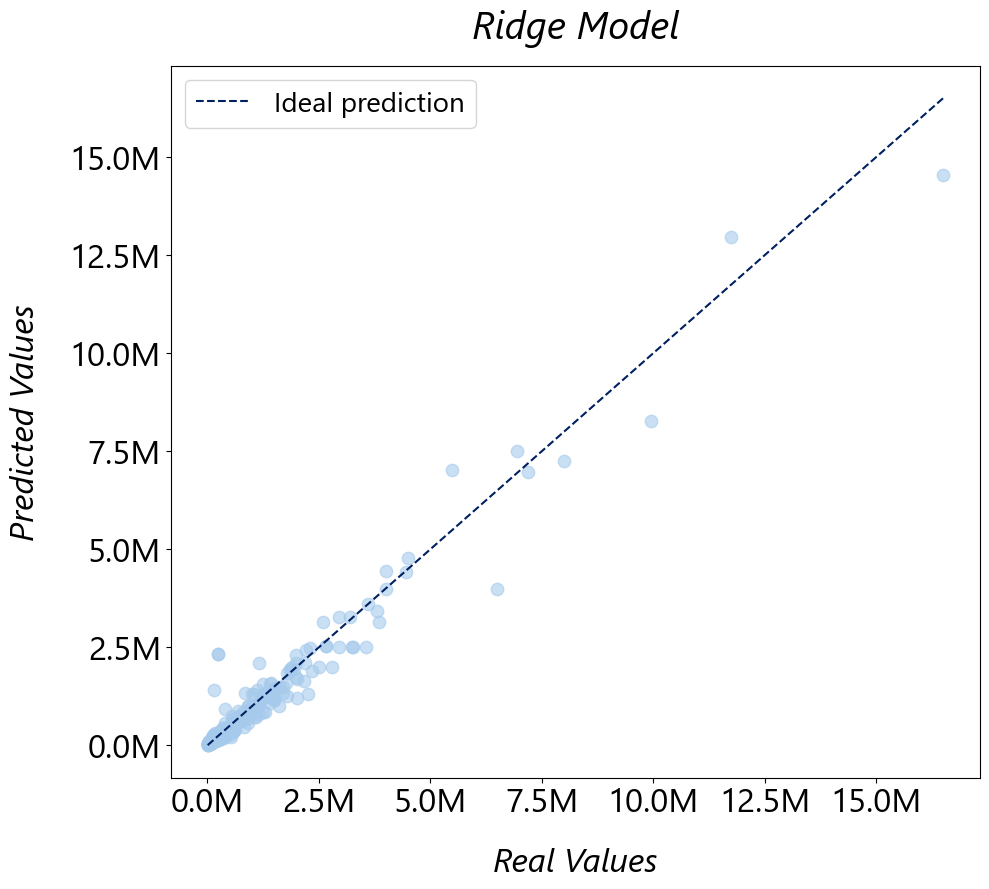

In [21]:
# RIDGE MODEL PERFORMANCE VISUALIZATION

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create figure
fig, ax = plt.subplots(figsize=(10, 9))

# Scatter plot
ax.scatter(y_test_original, y_pred, s=80, c='#A6CAEC',alpha=0.6, edgecolor='#A6CAEC')
ax.plot([min(y_test_original), max(y_test_original)],
        [min(y_test_original), max(y_test_original)],
         linestyle='--', color='#002060',label='Ideal prediction')

# Labels and title
ax.set_xlabel('Real Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.set_ylabel('Predicted Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=24)

# Axis format
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Offset font
ax.yaxis.get_offset_text().set_fontsize(24)
ax.xaxis.get_offset_text().set_fontsize(24)
ax.set_title('Ridge Model', fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)

ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

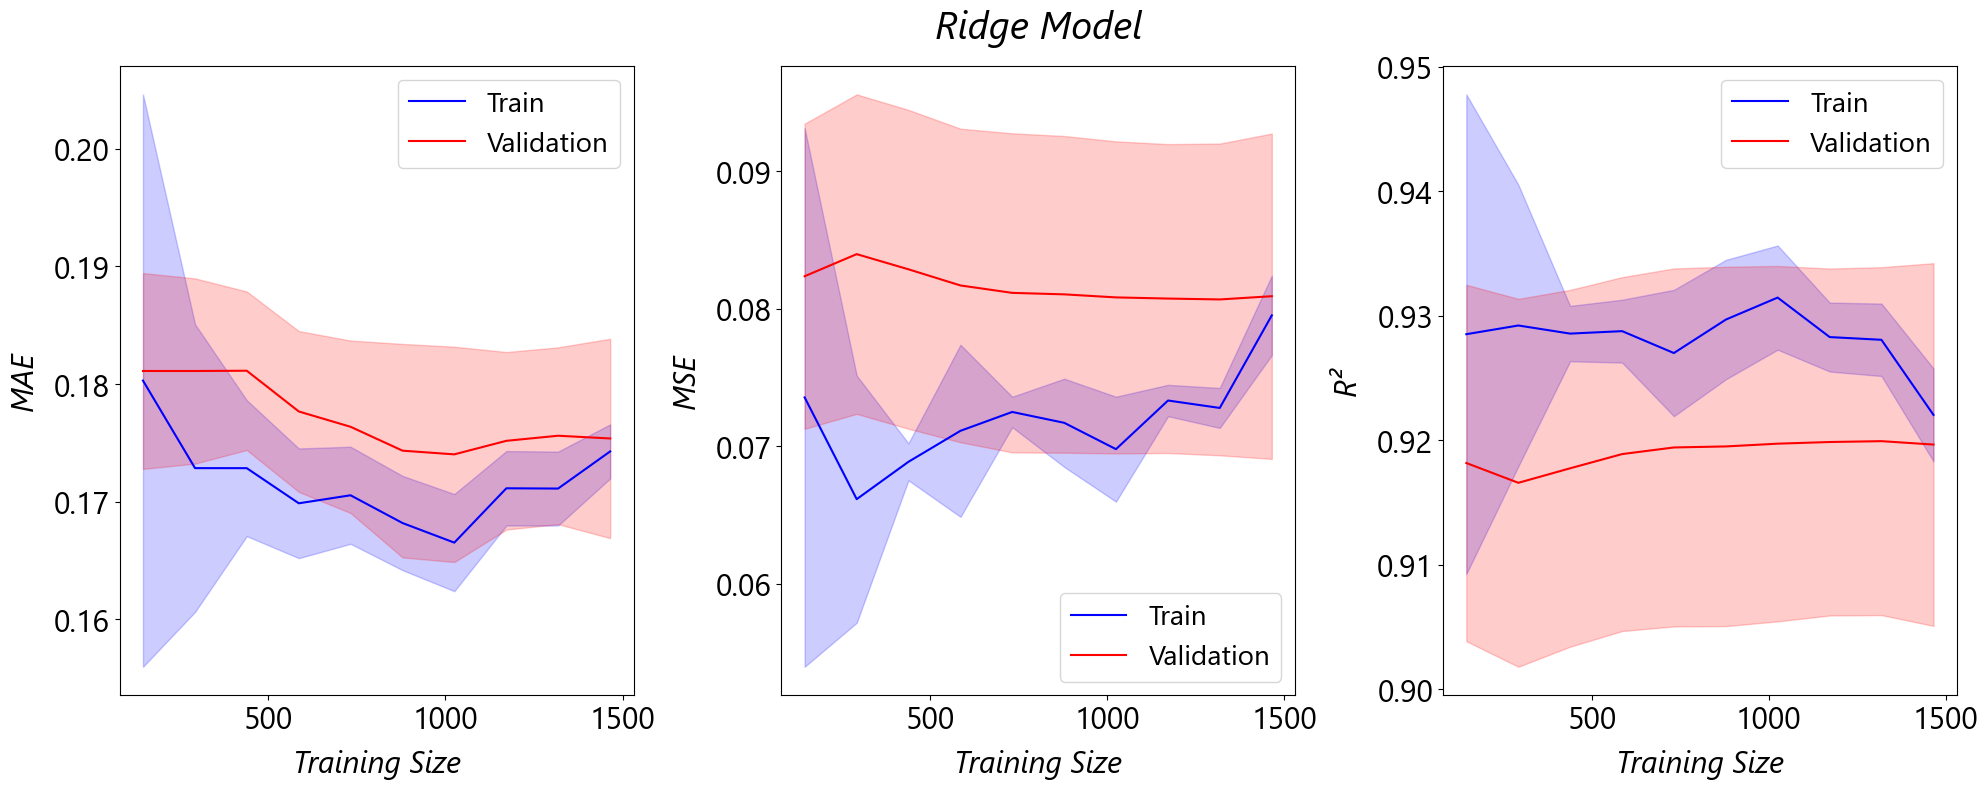

In [22]:
# RIDGE MODEL VALIDATION

from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Define metrics
scoring_mae = make_scorer(mean_absolute_error)
scoring_mse = make_scorer(mean_squared_error)
scoring_r2 = make_scorer(r2_score)

# Learning of curves for each of the metrics
train_sizes, train_scores_mae, valid_scores_mae = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mae, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_mse, valid_scores_mse = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mse, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_r2, valid_scores_r2 = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_r2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means and standard deviations
train_mean_mae = train_scores_mae.mean(axis=1)
valid_mean_mae = valid_scores_mae.mean(axis=1)
train_mean_mse = train_scores_mse.mean(axis=1)
valid_mean_mse = valid_scores_mse.mean(axis=1)
train_mean_r2 = train_scores_r2.mean(axis=1)
valid_mean_r2 = valid_scores_r2.mean(axis=1)

train_std_mae = train_scores_mae.std(axis=1)
valid_std_mae = valid_scores_mae.std(axis=1)
train_std_mse = train_scores_mse.std(axis=1)
valid_std_mse = valid_scores_mse.std(axis=1)
train_std_r2 = train_scores_r2.std(axis=1)
valid_std_r2 = valid_scores_r2.std(axis=1)


mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)


# Plot learning curves for MAE, MSE y R²
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# MAE
axs[0].plot(train_sizes, train_mean_mae, label="Train", color="blue")
axs[0].plot(train_sizes, valid_mean_mae, label="Validation", color="red")
axs[0].fill_between(train_sizes, train_mean_mae - train_std_mae, train_mean_mae + train_std_mae, color="blue", alpha=0.2)
axs[0].fill_between(train_sizes, valid_mean_mae - valid_std_mae, valid_mean_mae + valid_std_mae, color="red", alpha=0.2)
axs[0].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].set_ylabel("MAE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].tick_params(axis='both', which='major', labelsize=22)
axs[0].legend(fontsize=20)

# MSE
axs[1].plot(train_sizes, train_mean_mse, label="Train", color="blue")
axs[1].plot(train_sizes, valid_mean_mse, label="Validation", color="red")
axs[1].fill_between(train_sizes, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color="blue", alpha=0.2)
axs[1].fill_between(train_sizes, valid_mean_mse - valid_std_mse, valid_mean_mse + valid_std_mse, color="red", alpha=0.2)
axs[1].set_title("Ridge Model", fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)
axs[1].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].set_ylabel("MSE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].tick_params(axis='both', which='major', labelsize=22)
axs[1].legend(fontsize=20)

# R²
axs[2].plot(train_sizes, train_mean_r2, label="Train", color="blue")
axs[2].plot(train_sizes, valid_mean_r2, label="Validation", color="red")
axs[2].fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color="blue", alpha=0.2)
axs[2].fill_between(train_sizes, valid_mean_r2 - valid_std_r2, valid_mean_r2 + valid_std_r2, color="red", alpha=0.2)
axs[2].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].set_ylabel("R²", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].tick_params(axis='both', which='major', labelsize=22)
axs[2].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [23]:
# ELASTIC NET

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer, QuantileTransformer


# TRANSFORMATION OF PRICE COLUMN
df_encoded_transf = df_encoded.copy()
df_encoded_transf['Price_transf'] = np.log1p(df_encoded_transf['Price'])


# SPLIT TRAIN AND TEST DATA
X = df_encoded_transf.drop(columns=['Price_transf', 'Price'])
y = df_encoded_transf['Price'].values.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SCALE DATA (norm='l2' for Normalizer, output_distribution='normal', random_state=42 for QuantileTransformer)
scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = QuantileTransformer(output_distribution='normal', random_state=42)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


# HYPERPARAMETER TUNING
param_grid = {'alpha': np.logspace(-4, 1, 50), 'l1_ratio': np.linspace(0, 1, 11)} 
grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# MODEL TRAINING WITH BEST PARAMETERS
model = ElasticNet(alpha=best_params['alpha'], random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# MODEL EVALUATION
y_pred_scaled = model.predict(X_test_scaled)


# GOING BACK TO ORIGINAL SCALE
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()


# REVERSE TRANSFORAMTION
# y_pred = np.expm1(y_pred)
# y_test_original = np.expm1(y_test_original)


# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred)
r2 = r2_score(y_test, y_pred)

# MODEL METRICS PERFORMANCE
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
medae = median_absolute_error(y_test_original, y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
r2 = r2_score(y_test_original, y_pred)

print(f"""
Model Performance:
-------------------
Mean Absolute Error (MAE): {mae:.2f}
Root Mean Squared Error (RMSE): {rmse:.2f}
Median Absolute Error (MedAE): {medae:.2f}
Mean Absolute Percentage Error (MAPE): {mape:.2f}%
R² Score: {r2:.4f}
""")

Best parameters: {'alpha': 0.0010481131341546852, 'l1_ratio': 0.1}

Model Performance:
-------------------
Mean Absolute Error (MAE): 112868.91
Root Mean Squared Error (RMSE): 297567.11
Median Absolute Error (MedAE): 27475.65
Mean Absolute Percentage Error (MAPE): 26.53%
R² Score: 0.9563



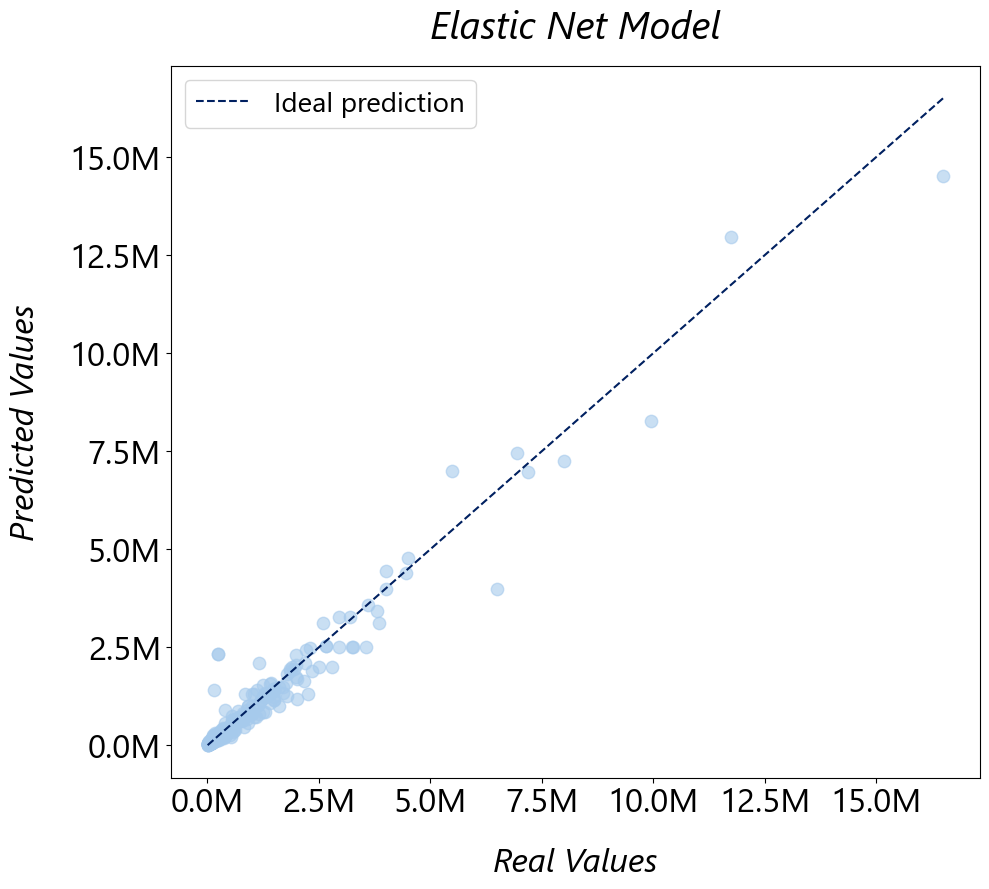

In [24]:
# ELASTIC NET MODEL PERFORMANCE VISUALIZATION

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create figure
fig, ax = plt.subplots(figsize=(10, 9))

# Scatter plot
ax.scatter(y_test_original, y_pred, s=80, c='#A6CAEC',alpha=0.6, edgecolor='#A6CAEC')
ax.plot([min(y_test_original), max(y_test_original)],
        [min(y_test_original), max(y_test_original)],
         linestyle='--', color='#002060',label='Ideal prediction')

# Labels and titles
ax.set_xlabel('Real Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.set_ylabel('Predicted Values', fontsize=24, fontname='Segoe UI', fontstyle='italic', labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=24)

# Axis format
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Offset font
ax.yaxis.get_offset_text().set_fontsize(24)
ax.xaxis.get_offset_text().set_fontsize(24)
ax.set_title('Elastic Net Model', fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)

ax.legend(fontsize=20)
plt.tight_layout()
plt.show()

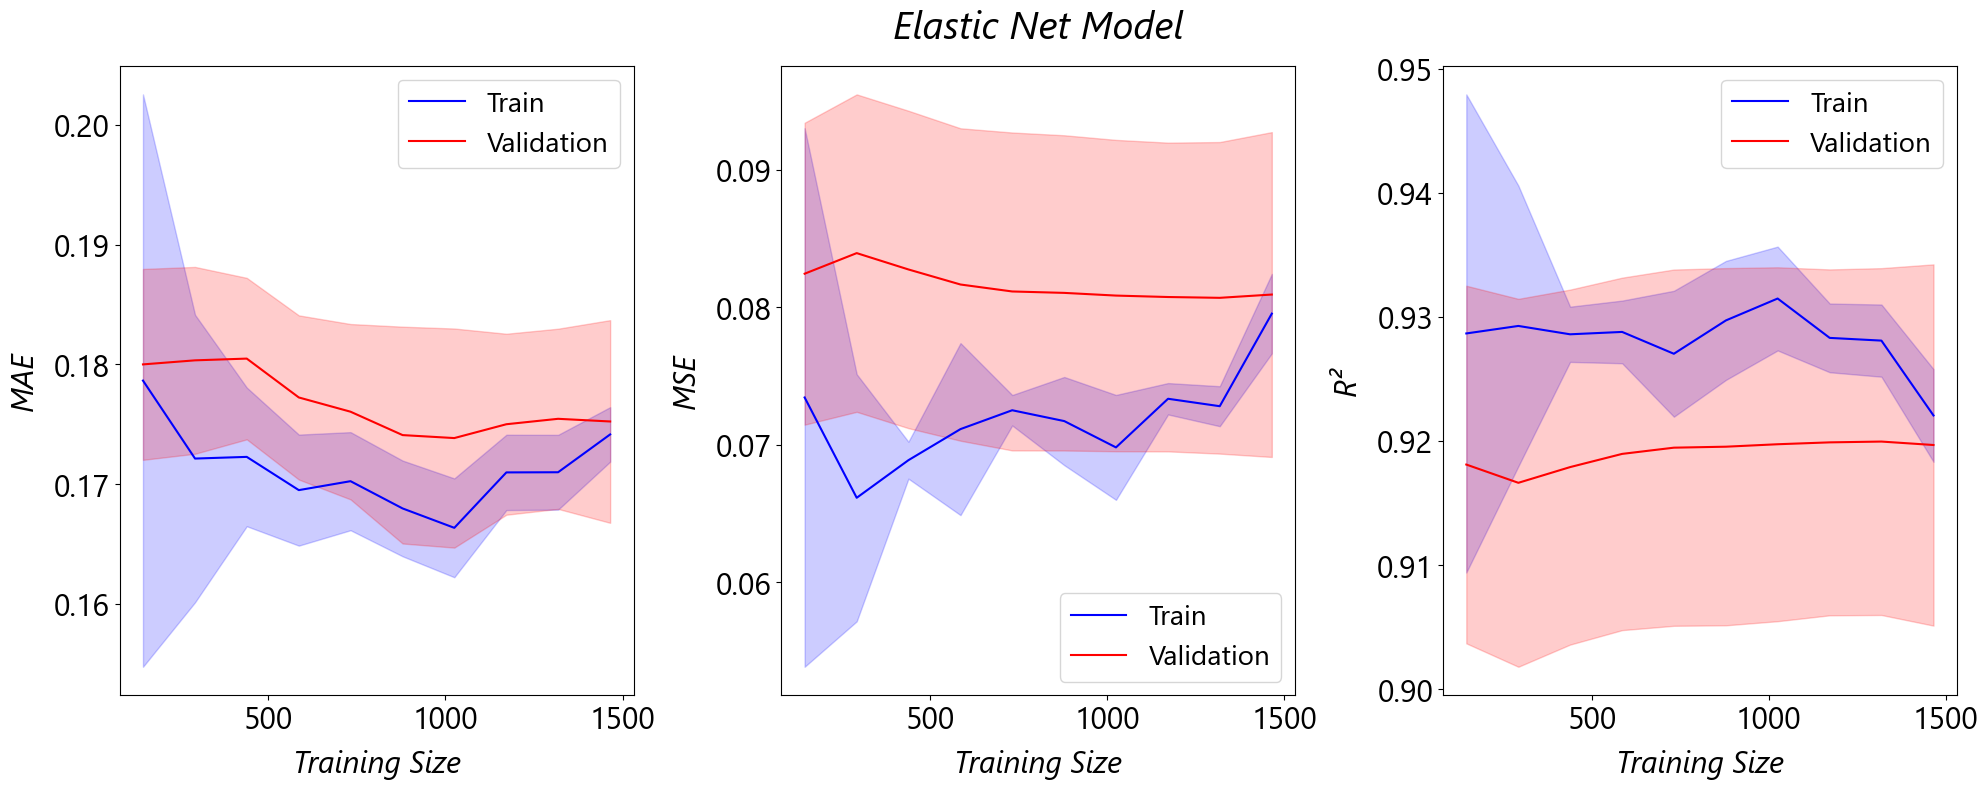

In [25]:
# ELASTIC NET MODEL VALIDATION

from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

# Define metrics
scoring_mae = make_scorer(mean_absolute_error)
scoring_mse = make_scorer(mean_squared_error)
scoring_r2 = make_scorer(r2_score)

# Learning of curves for each of the metrics
train_sizes, train_scores_mae, valid_scores_mae = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mae, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_mse, valid_scores_mse = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_mse, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores_r2, valid_scores_r2 = learning_curve(
    model, X_train_scaled, y_train_scaled, cv=5, scoring=scoring_r2, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means and standard deviations
train_mean_mae = train_scores_mae.mean(axis=1)
valid_mean_mae = valid_scores_mae.mean(axis=1)
train_mean_mse = train_scores_mse.mean(axis=1)
valid_mean_mse = valid_scores_mse.mean(axis=1)
train_mean_r2 = train_scores_r2.mean(axis=1)
valid_mean_r2 = valid_scores_r2.mean(axis=1)

train_std_mae = train_scores_mae.std(axis=1)
valid_std_mae = valid_scores_mae.std(axis=1)
train_std_mse = train_scores_mse.std(axis=1)
valid_std_mse = valid_scores_mse.std(axis=1)
train_std_r2 = train_scores_r2.std(axis=1)
valid_std_r2 = valid_scores_r2.std(axis=1)


mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)


# Plot learning curves for MAE, MSE y R²
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# MAE
axs[0].plot(train_sizes, train_mean_mae, label="Train", color="blue")
axs[0].plot(train_sizes, valid_mean_mae, label="Validation", color="red")
axs[0].fill_between(train_sizes, train_mean_mae - train_std_mae, train_mean_mae + train_std_mae, color="blue", alpha=0.2)
axs[0].fill_between(train_sizes, valid_mean_mae - valid_std_mae, valid_mean_mae + valid_std_mae, color="red", alpha=0.2)
axs[0].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].set_ylabel("MAE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[0].tick_params(axis='both', which='major', labelsize=22)
axs[0].legend(fontsize=20)

# MSE
axs[1].plot(train_sizes, train_mean_mse, label="Train", color="blue")
axs[1].plot(train_sizes, valid_mean_mse, label="Validation", color="red")
axs[1].fill_between(train_sizes, train_mean_mse - train_std_mse, train_mean_mse + train_std_mse, color="blue", alpha=0.2)
axs[1].fill_between(train_sizes, valid_mean_mse - valid_std_mse, valid_mean_mse + valid_std_mse, color="red", alpha=0.2)
axs[1].set_title("Elastic Net Model", fontsize=28, fontstyle='italic', fontname='Segoe UI', pad=20)
axs[1].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].set_ylabel("MSE", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[1].tick_params(axis='both', which='major', labelsize=22)
axs[1].legend(fontsize=20)

# R²
axs[2].plot(train_sizes, train_mean_r2, label="Train", color="blue")
axs[2].plot(train_sizes, valid_mean_r2, label="Validation", color="red")
axs[2].fill_between(train_sizes, train_mean_r2 - train_std_r2, train_mean_r2 + train_std_r2, color="blue", alpha=0.2)
axs[2].fill_between(train_sizes, valid_mean_r2 - valid_std_r2, valid_mean_r2 + valid_std_r2, color="red", alpha=0.2)
axs[2].set_xlabel("Training Size", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].set_ylabel("R²", fontsize=22, fontname='Segoe UI', fontstyle='italic', labelpad=10)
axs[2].tick_params(axis='both', which='major', labelsize=22)
axs[2].legend(fontsize=20)

plt.tight_layout()
plt.show()